In [4]:
from torchviz import make_dot
from transformers import BertModel, BertTokenizer

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
text = 'This project aims to implement a transformer layer on a cluster of FPGAs. In recent years transformers have outperformed traditional convolutional neural networks in many fields, but serial performance is dismal and parallel GPU performance is power-intensive. Specialized architectures have been studied little, especially using FPGA platforms. This research will improve transformer inference performance by offloading computationally intensive sections of the network to reconfigurable accelerators running on a cluster of multiple FPGA devices. This research will result in an acceleration architecture for a single layer of a transformer network along with a performance comparison with CPU and GPU baselines. We propose the investigation of distributed transformer inference across a cluster of multiple field programmable gate arrays (FPGAs). This research will investigate the partitioning of a transformer layer across multiple FPGA devices along with networking between FPGAs in the cluster. Transformers have become a dominant machine learning architecture for many domains such as natural language processing, therefore high speed inference is desirable. However, networks sizes and limited FPGA resources often make inference on a single FPGA slow due to limited parallelism and pipeline depth or impossible due to limited resources. The purpose of this research is to explore methods to overcome these challenges by introducing parallelism through multi-FPGA clusters. Transformers are highly parallel neural network architectures which consist of stacks of encoder and decoder layers. These layers consist of many linear transformations on matrices which are represented by matrix-matrix multiplication. Within an encoder/decoder layer there is an opportunity to parallelize both between concurrent general matrix multiplies (GeMM) and within each GeMM. Attempting to serialize these operations on a CPU leads to high execution time and is a poor utilization of the CPU\'s general purpose architecture. GPUs can deliver high throughput inference for transformers, though they are power-hungry and do not achieve the low latency required by some applications. Both in the datacenter and at the edge, low-latency and efficient inference is desired. Optimally, there would be an architecture that could scale between these two extremes of computational demand. State-of-the-art transformers can contain upwards of 12 layers and multiply matrices on the order of 1024x1024 elements. In addition, the trend of increasing transformer size does not show signs of slowing. This large use of memory and FLOPs leads to difficulty mapping an entire transformer network to a '
encoded_input = tokenizer(text, return_tensors='pt')
embedding_output = model.embeddings(
    input_ids=encoded_input['input_ids'],
    position_ids=None,
    token_type_ids=encoded_input['token_type_ids'],
    inputs_embeds=None,
    past_key_values_length=0,
)
layer_out = model.encoder.layer[0](embedding_output)[0]

In [25]:
?make_dot

In [24]:
make_dot(layer_out, params=dict(list(model.encoder.layer[0].named_parameters()))).render("BertLayer", format="png")

'BertLayer.png'

In [29]:
import hiddenlayer as hl
import matplotlib

# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
transforms = None
hl.build_graph(model.encoder.layer[0], embedding_output)

AttributeError: 'Digraph' object has no attribute '_repr_svg_'

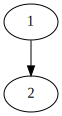

In [31]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
dot